В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [ ]:
# эти модули, вероятнее всего, понадобятся вам в работе
# если в процессе захотите использовать что-то еще, можно добавить
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/monster_com-job_sample.csv')
df.sample(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
1629,1629,1629,1629,United States of America,US,NaN,No,jobs.monster.com,RESPONSIBILITIES:Kforce has a client in Piscat...,Quality Assurance Engineer Job in Piscataway,"Full Time, Temporary/Contract/Project","Piscataway, NJ 08854",NaN,http://jobview.monster.com/quality-assurance-e...,NaN,Experienced (Non-Manager),37b08e8c00f8ba0fb577ba2665074268
9086,9086,9086,9086,United States of America,US,NaN,No,jobs.monster.com,"VILLAGE OF VERNON HILLS, ILENTRY LEVEL PUBLIC ...",Temporary Maintenance Worker Job in Vernon Hills,Full Time,"Vernon Hills, IL 60061",Government and Military,http://jobview.monster.com/Temporary-Maintenan...,$10.25+ /hour,Entry Level,82f440874b2e58d2a5ffcff8f4440a9b
19650,19650,19650,19650,United States of America,US,NaN,No,jobs.monster.com,Full-TimeBrookdale The Woodlands 1730 Woodstea...,Cook Job in The Woodlands,Full Time Employee,"The Woodlands, TX 77380",Healthcare Services Restaurant/Food Services F...,http://jobview.monster.com/Cook-Job-The-Woodla...,NaN,Food Services/Hospitality,4559f3ada9c21751f39d5db69c613914
2096,2096,2096,2096,United States of America,US,NaN,No,jobs.monster.com,The position of Project Coordinator is a key p...,Project Coordinator (Weekend Shift) Job in San...,Full Time,"San Francisco, CA 94105",Other/Not Classified,http://jobview.monster.com/project-coordinator...,NaN,NaN,21058ea37a145746b9d490185ecb6dd5
3427,3427,3427,3427,United States of America,US,NaN,No,jobs.monster.com,Dreaming of a health care career? As a Nationa...,Health Care Specialist Job in Bloomington bod...,NaN,Bloomington 47401,NaN,http://jobview.monster.com/Health-Care-Special...,NaN,General/Other: Medical/Health,b0ad7729367c6fe4a7680b3123a5cacc
10015,10015,10015,10015,United States of America,US,NaN,No,jobs.monster.com,"At United States Steel Corporation, our streng...",Electrical Distribution Shift Manager Job in Gary,Full Time,"Gary, IN 46402",Metals and Minerals,http://jobview.monster.com/Electrical-Distribu...,NaN,Manager (Manager/Supervisor of Staff),073b3f208ed1639755815a133b57c810
6531,6531,6531,6531,United States of America,US,NaN,No,jobs.monster.com,"Report this job About the Job Director, Workfo...",Kern Community College District Job Applicatio...,"Full Time, Employee","Director, Workforce Development (Economic and ...",All,http://jobview.monster.com/director-workforce-...,NaN,NaN,296f8c0e3233681ae42fa10110ed2379
8852,8852,8852,8852,United States of America,US,NaN,No,jobs.monster.com,POSITION PURPOSE- The Sr. Operations Business ...,SR OPERATIONS BUSINESS ANALYST- TOOL RENTAL Jo...,Full Time,"Atlanta, GA 30301",Retail,http://jobview.monster.com/sr-operations-busin...,NaN,Manager (Manager/Supervisor of Staff),0411f03f0414a3ad2ce80fb32449dbbc
8121,8121,8121,8121,United States of America,US,NaN,No,jobs.monster.com,"Job Purpose:Restores patient's function, allev...",Physical Therapist Job in Bel Air,Full Time,"Bel Air, MD 21014",Healthcare Services,http://jobview.monster.com/Physical-Therapist-...,"50,000.00 - 75,000.00 $ /year",Experienced (Non-Manager),33ee8d9630f6747dd6feb95b9ac60d4b
1862,1862,1862,1862,United States of America,US,NaN,No,jobs.monster.com,Job ID: 88852 Georgia Masonry Supply is a di...,Maintenance Mechanic - Jonesboro,Full Time Employee,"Jonesboro, GA",NaN,http://jobview.monster.com/maintenance-mechani...,NaN,NaN,0b1bd509ef3dcadfb3abaf92e413e22b


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)

country - string - проблем нет, все значения одинаковые

country_code - string - проблем нет, все значения одинаковые

date_added - ? - все полученные строки NaN

has_expired - string - проблем нет, все значения одинаковые

job_board - string - проблем нет, все значения одинаковые

job_description - string - проблем нет

job_title - string - проблем нет

job_type - string - есть пропущенные значения

location - string - проблем нет

organization - string - есть пропущенные значения

page_url - string - проблем нет

salary - ? - есть пропущенные значения, они отличаются размерностью (в час/в год)

sector - string - есть пропущенные значения

uniq_id - string - проблем нет




#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

In [ ]:
df.isnull().sum()

Unnamed: 0.2           0
Unnamed: 0.1           0
Unnamed: 0             0
country                0
country_code           0
date_added         21878
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1628
location               0
organization        6867
page_url               0
salary             18554
sector              5194
uniq_id                0
dtype: int64

<Axes: >

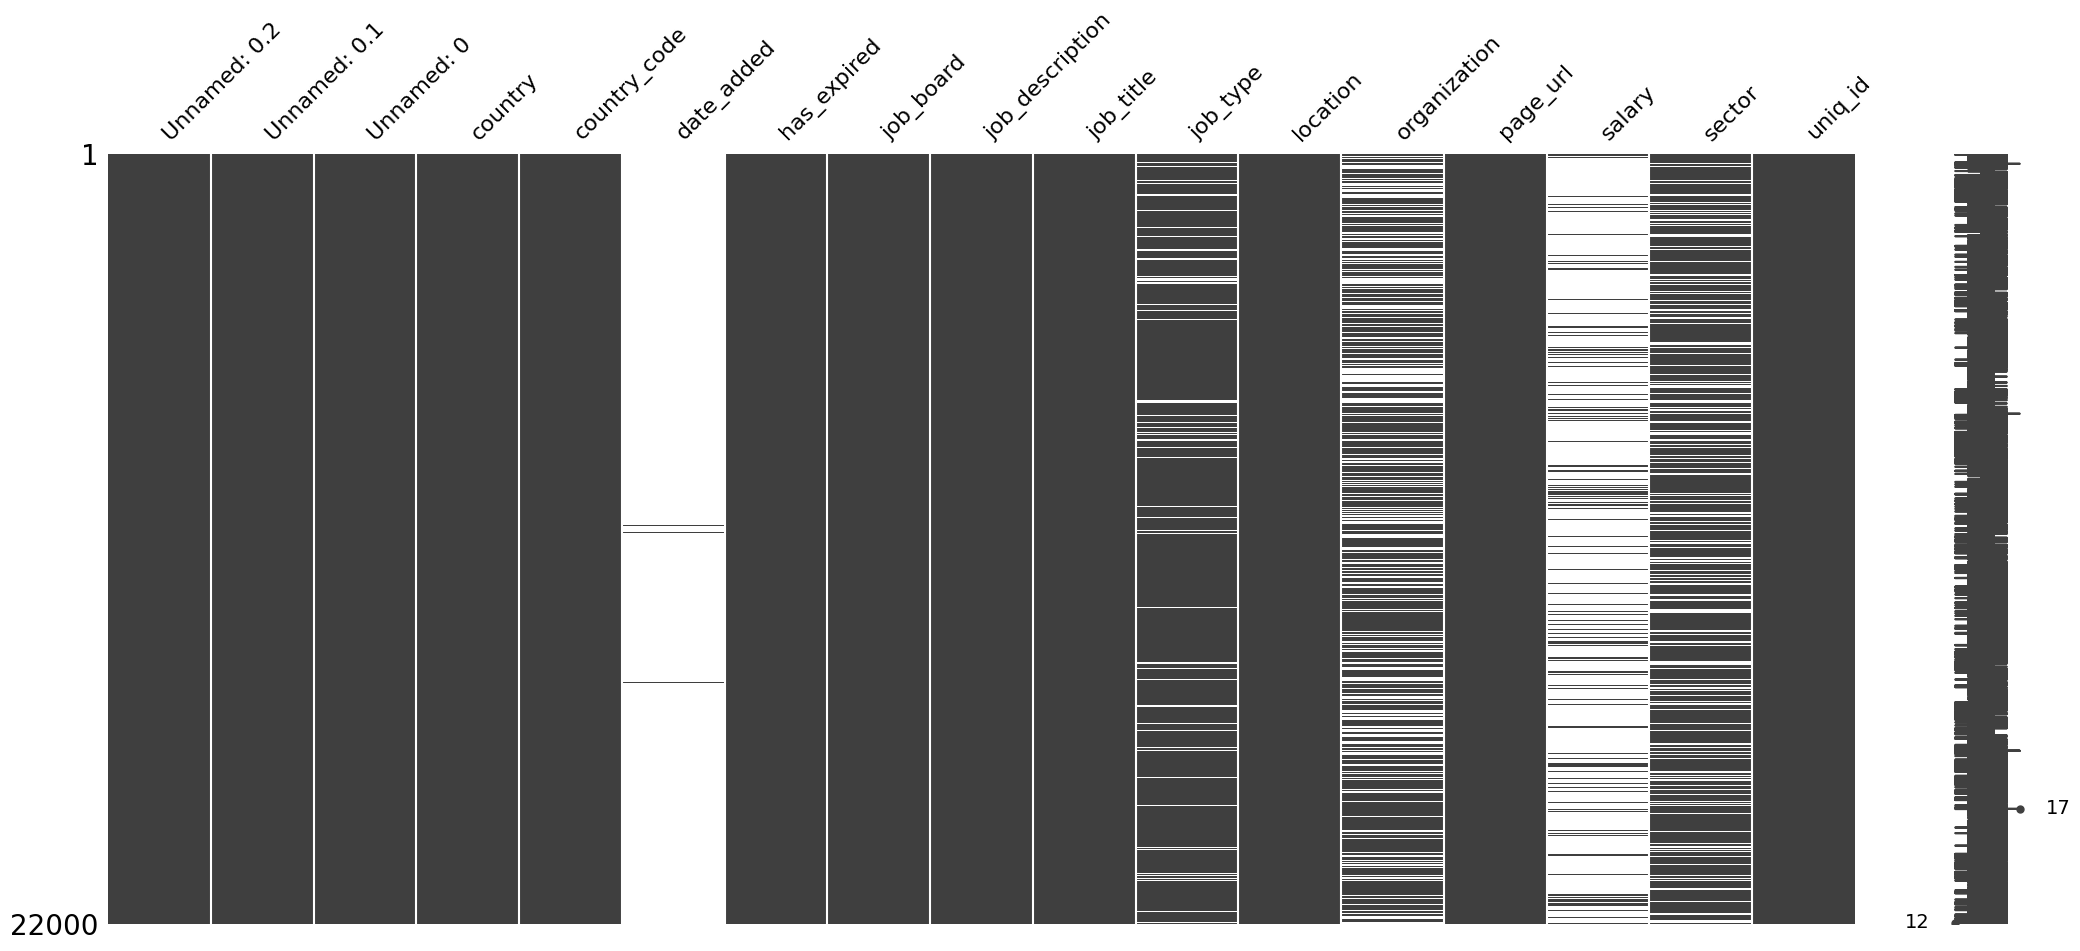

In [ ]:
msno.matrix(df)

Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

**Дублирование csv - файла:**

In [ ]:
remove_data = pd.read_csv('/content/drive/MyDrive/monster_com-job_sample.csv')
print("Размер датасета до удаления:", remove_data.shape)
remove_data.dropna(inplace=True)
print("Размер датасета после удаления:", remove_data.shape)

Размер датасета до удаления: (22000, 17)
Размер датасета после удаления: (5, 17)


**При удалении строк с пропущенными значениями мы теряем практически все данные, что может существенно повлиять на результаты анализа. Поэтому необходимо более тщательно рассмотреть причины пропусков и выбрать наиболее подходящий метод их обработки.**


Принимаем решение сохранить как можно больше данных, удалять все – плохой план. Если удалить все, можем потерять важную информацию.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?
3. Какие столбцы содержательно нерелевантны? Обоснуйте.

In [ ]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(col)

country
country_code
has_expired
job_board


**Если такие столбцы есть, то они не несут информации для анализа и могут быть удалены из датасета.**

In [ ]:
for col in df.columns:
    if df[col].duplicated().any():
        print(col)

country
country_code
date_added
has_expired
job_board
job_description
job_title
job_type
location
organization
salary
sector


**Например, столбцы country и country_code могут быть удалены, если уже есть столбец с названием страны или кодом страны. Также столбец has_expired может быть нерелевантен, если все записи в датасете действительны. Столбец job_board может быть нерелевантен, если датасет содержит информацию только о одном сайте поиска работы. Столбцы job_type, organization, salary и sector также могут быть удалены, если они не являются ключевыми факторами для анализа данных.**

#### Дублирование данных

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

In [ ]:
print('Размер датасета до удаления дублирующихся строк: ', df.shape)
df.drop_duplicates(subset=['job_description','job_title', 'location'], inplace=True)
print('Размер датасета после удаления дублирующихся строк: ', df.shape)

Размер датасета до удаления дублирующихся строк:  (22000, 17)
Размер датасета после удаления дублирующихся строк:  (20774, 17)


### Обработка датасета

#### Первичная обработка

Выше мы оценили, какие есть проблемы с дубликатами и отсутствующими значениями.

Первым делом устраним их. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

In [ ]:
# Удаление строк или столбцы с пустыми ячейками
df.dropna(subset=['job_type', 'organization', 'salary', 'sector'], how='all', inplace=True)

In [ ]:
# Удаление нерелевантных столбцов
# Удаляем столбцы country, country_code, has_expired и job_board и каких-то новых странных столбцов
df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'country', 'country_code', 'has_expired', 'job_board', 'date_added'], axis=1, inplace=True)
df.shape

(20079, 9)

In [ ]:
# Удаление дубликатов
df.drop_duplicates(subset=['job_description','job_title', 'location'], inplace=True)

In [ ]:
df.to_csv('new_file.csv', index=False)

<Axes: >

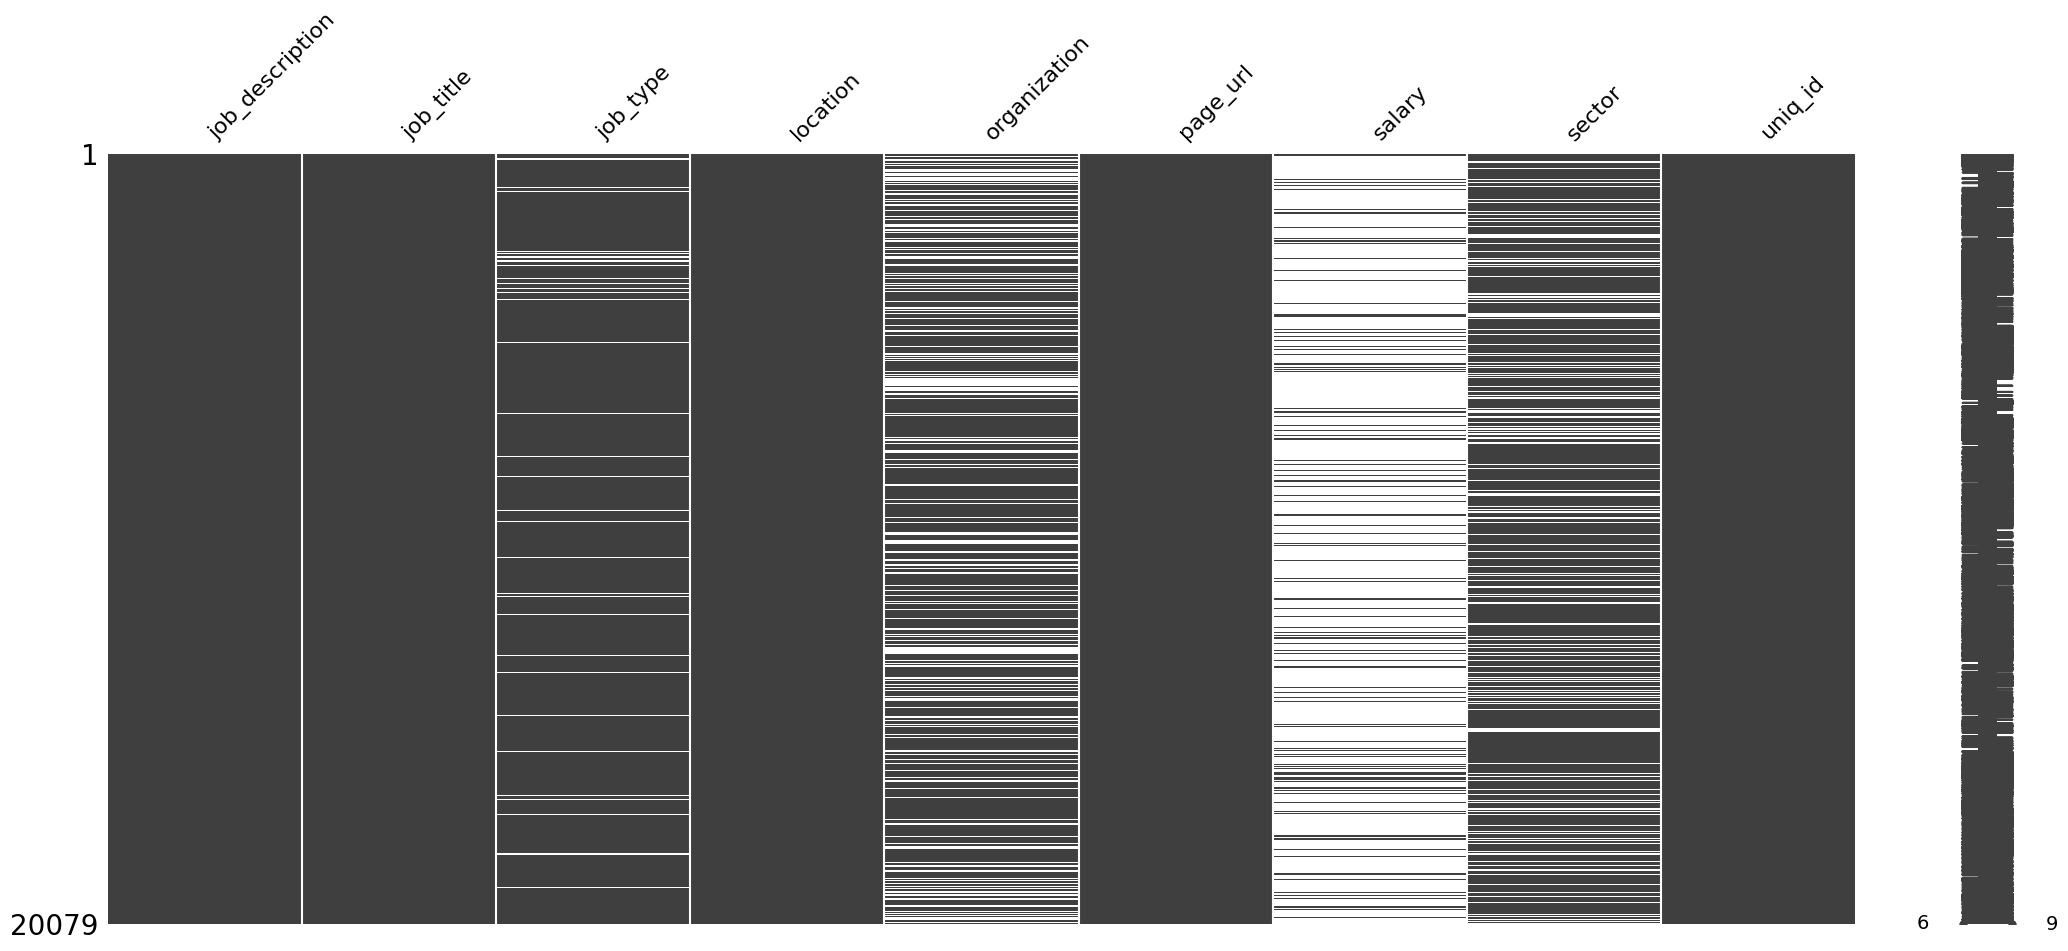

In [ ]:
msno.matrix(df)

#### Обработка колонки location

Выясните, какие форматы значений есть в столбце `location`. Сделайте выводы.

In [ ]:
df['location'].value_counts()

Dallas, TX                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

1. **Город, код штата**
2. **Город, код штата индекс**
3. **Индекс**
4. **Город индекс**
5. **Город Индекс Код штата**

На этом этапе у вас должно получиться минимум 2 валидных формата данных (город+код штата, город+код штата+индекс). Напишите регулярные выражения или воспользуйтесь известными вам методами обработки текста для поиска этих форматов. Если, на ваш взгляд, стоит выделить больше форматов, сделайте это.

In [ ]:
# Функция для определения формата данных в строке
def detect_format(text):
    if len(text) > 30:
        return "unknown"
    if city_state_idx_regex.search(text):
        return "city_state_idx"
    elif city_state_regex.search(text):
        return "city_state"
    elif idx_regex.search(text):
        return "idx"
    elif city_idx_regex.search(text):
        return "city_idx"
    elif state_regex.search(text):
        return "state"
    elif city_idx_state_regex.search(text):
        return "city_idx_state"
    else:
        return "unknown"

# Регулярное выражение для формата Город + код штата
city_state_regex = re.compile(r"\b[A-Z][a-z]+,\s[A-Z]{2}\b")
# Регулярное выражение для формата Город + код штата + индекс
city_state_idx_regex = re.compile(r"\b[A-Z][a-z]+,\s[A-Z]{2}\s\d{5}\b")
# Регулярное выражение для формата Город Индекс Код штата
city_idx_state_regex = re.compile(r"\b[A-Z][a-z]+\s\d{5},\s[A-Z]{2}\b")
# Регулярное выражение для формата Город Индекс
city_idx_regex = re.compile(r"\b[A-Z][a-z]+(?:\s[A-Z][a-z]*)*\s\d{5}\b")
# Регулярное выражение для формата Код штата
state_regex = re.compile(r"\b[A-Z]{2}\b")
# Регулярное выражение для формата Индекс
idx_regex = re.compile(r"^\d{5}$")

In [ ]:
# Добавляем столбец с форматом данных
df['format'] = df['location'].apply(detect_format)

df[['location', 'format']]

,location,format
0,"Madison, WI 53702",city_state_idx
1,"Madison, WI 53708",city_state_idx
2,DePuy Synthes Companies is a member of Johnson...,unknown
3,"Dixon, CA",city_state
4,"Camphill, PA",city_state
...,...,...
21995,"Cincinnati, OH",city_state
21996,"Cincinnati, OH 45236",city_state_idx
21997,"Chicago, IL 60602",city_state_idx
21998,"Chicago, IL 60609",city_state_idx


Визуализируйте количество найденных форматов данных на столбиковой или круговой диаграмме.

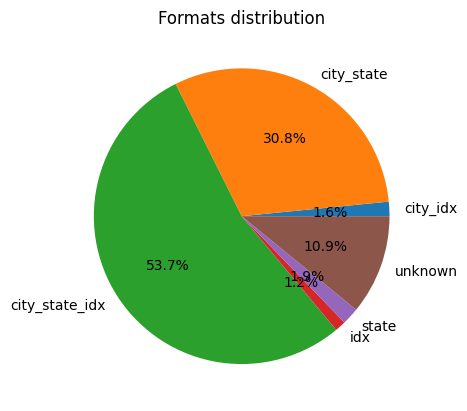

In [ ]:
# Группируем данные по формату и считаем количество строк в каждой группе
format_counts = df.groupby('format').size()

# Визуализируем на круговой диаграмме
plt.pie(format_counts, labels=format_counts.index, autopct='%1.1f%%')
plt.title("Formats distribution")
plt.show()

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [ ]:
def split_location(text, format):
    if format == "city_state":
        try:
            city, state = text.split(", ")
            return (city, state, None)
        except ValueError:
            return (None, None, None)
        return (city, state, None)
    elif format == "state":
        return (None, text, None)    
    elif format == "city_state_idx":
        match = re.search(r"(\b[A-Z][a-z]+(?:\s[A-Z][a-z]*)*)\s*,\s*([A-Z]{2})\s*(\d{5})\b", text)
        if match:
            city, state, idx = match.groups()
            return (city, state, idx)
        else:
            return (None, None, None)
    elif format == "idx":
        return (None, None, text)
    elif format == "city_idx":
        matches = re.findall(r"\b([A-Z][a-z]+(?:\s[A-Z][a-z]*)*)\s(\d{5})\b", text)
        if len(matches) == 1:
            city, idx = matches[0]
            return (city, None, idx)
        else:
            return (None, None, None)
    else:
        return (None, None, None)



df["city"], df["state"], df["idx"] = zip(*df.apply(lambda row: split_location(row["location"], row["format"]), axis=1))
df_unknown = df[df["format"] == "unknown"].copy()
df.drop(df[df["format"] == "unknown"].index, inplace=True)

df[["city", "state", "idx"]]

,city,state,idx
0,Madison,WI,53702
1,Madison,WI,53708
3,Dixon,CA,None
4,Camphill,PA,None
5,Charlottesville,VA,None
...,...,...,...
21995,Cincinnati,OH,None
21996,Cincinnati,OH,45236
21997,Chicago,IL,60602
21998,Chicago,IL,60609


In [ ]:
df_unknown[["job_description", "location"]]

,job_description,location
2,Report this job About the Job DePuy Synthes Co...,DePuy Synthes Companies is a member of Johnson...
6,Report this job About the Job Based in San Fra...,Contact name Tony Zerio
29,Experis is working with a Pharmaceutical start...,"Sr. Process Engineer, Manufacturing"
36,"POSITION TITLE: RF System Technician, Field Se...","RF System Technician, Field Service"
38,**MUST be able to work as a W2 employee for AN...,Bi-Lingual Editorial Strategist
...,...,...
21899,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Location: ...
21933,"About Us: EMCOR Facilities Services (EFS), an ...",Location:
21944,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner-16150DescriptionLocation: ...
21967,"About Us: Viox Services, a wholly owned subsid...",Location:


Рассмотрите отложенную часть выборки и сделайте выводы о возможности извлечь из данных город, штат и индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [ ]:
# Создаем пустой список для хранения индексов строк, которые нужно переместить из df_unknown в df
idx_to_move = []

# Проходимся по каждой строке в df_unknown
for idx, row in df_unknown.iterrows():
    # Проверяем, совпадают ли значения в столбцах location и job_description
    if row['location'].lower().strip() == row['job_description'].lower().strip():
        # Очищаем значение в столбце location
        df_unknown.at[idx, 'location'] = ''
        # Добавляем индекс строки в список idx_to_move
        idx_to_move.append(idx)

    # проверяем, содержит ли значение столбца location из df_unknown только слова "Location:" или "Location(s):"
    elif row['location'].lower().strip() == 'location:' or row['location'].lower().strip() == 'location(s):':
        # очищаем данные в столбце location
        row['location'] = ''
        # добавляем индекс строки в список idx_to_move
        idx_to_move.append(idx)    

    # Проверяем, содержит ли значение столбца location часть информации из столбца job_title
    elif row['location'].lower().strip() in row['job_title'].lower().strip():
        # Разделяем значение столбца job_title на должность и местоположение по разделителю " Job in "
        job_title_parts = row['job_title'].split(' Job in ')
        if len(job_title_parts) > 1:
            job_title = job_title_parts[0]
            location = job_title_parts[1]
        else:
            job_title = job_title_parts[0]
            location = ''
            
        # Очищаем данные в столбцах job_title и location в df_unknown
        df_unknown.at[idx, 'job_title'] = job_title
        df_unknown.at[idx, 'location'] = location
        # Добавляем индекс строки в список idx_to_move
        idx_to_move.append(idx)

    # Проверяем, имеет ли значение столбца location длину меньше 50 символов и содержит ли слово "adress"
    elif len(row['location']) < 50 and 'address' in row['location'].lower():
        # Удаляем слово "adress" из значения столбца location
        df_unknown.at[idx, 'location'] = row['location'].lower().replace('address', '').strip()
        # Добавляем индекс строки в список idx_to_move
        idx_to_move.append(idx)    

    elif len(row['location']) < 150:
        location_text = row['location']
        job_title_text = row['job_title']
        address_pattern = r'(Job in )([A-Za-z0-9\s,]+)([A-Z]{2})'
        address_match = re.search(address_pattern, job_title_text)
        if address_match:
            address_text = address_match.group(2) + ', ' + address_match.group(3)
            df_unknown.at[idx, 'location'] = address_text
        else:
            df_unknown.at[idx, 'location'] = ''
        idx_to_move.append(idx)
    
    elif len(row['location']) > 500:
        # Очищаем значение в столбце location
        df_unknown.at[idx, 'location'] = ''
        # Добавляем индекс строки в список idx_to_move
        idx_to_move.append(idx)


# Перемещаем строки из df_unknown в df
df = pd.concat([df, df_unknown.loc[idx_to_move]])

# Удаляем перемещенные строки из df_unknown
df_unknown = df_unknown.drop(idx_to_move)

df_unknown[['organization', 'location']]

,organization,location
6920,Energy and Utilities,"Job SummaryCompanyAPCLocationPlainfield, IN 46..."
9084,NaN,Company: Kimberly-Clark Corporation Location: ...
9748,NaN,Company: Kimberly-Clark Corporation Location: ...
12383,Energy and Utilities,"Job SummaryCompanyAPCLocationCincinnati, OH 45..."
13140,NaN,Company: Kimberly-Clark Corporation Location: ...
16089,Energy and Utilities,"Job SummaryCompanyAPCLocationCincinnati, OH 45..."
16641,NaN,Note: looking for US citizen or Green card can...
18464,NaN,"Job SummaryCompanyAPCLocationGlen Raven, NC 27..."
18466,NaN,"Job SummaryCompanyAPCLocationGreensboro, NC 27..."
20099,NaN,Company: Kimberly-Clark Corporation Location: ...


In [ ]:
# Очистка столбца 'location' в df_unknown
df_unknown['location'] = ''

# Объединение df и df_unknown в один DataFrame
df = pd.concat([df, df_unknown], ignore_index=True)
df[['location']]

,location
0,"Madison, WI 53702"
1,"Madison, WI 53708"
2,"Dixon, CA"
3,"Camphill, PA"
4,"Charlottesville, VA"
...,...
20074,
20075,
20076,
20077,


**Если бы была допустима ручная обработка, я бы смогла справиться с данной задачей лучше (exсel, sql). Но здесь мои возможности ограничены тем, смогу ли я придумать программный код для выполнения данной задачи :(**

#### Обработка колонки salary

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
df['salary'].unique()

array([nan, '9.00 - 13.00 $ /hour', '80,000.00 - 95,000.00 $ /year', ...,
       '0.00 - 0.01 $ /year', '0.00 - 44,000.00 $ /year',
       '900.00 - 1,200.00 $ /per dayPer Class'], dtype=object)

**Данным очень плохо, потому что они в разных системах счисления.**

У вас должны получиться следующие форматы:
* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

В каждом из форматов может быть и не быть знака доллара.

Последний формат выбивается отсутствием /hour /year в записи, его необходимо внимательно проверить.

Напишем регулярные выражения, обобщающие эти форматы.

<ipython-input-194-86e080f6ef0e>:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  salary_counts = [df['salary'].str.contains(pattern, regex=True).sum() for pattern in patterns]


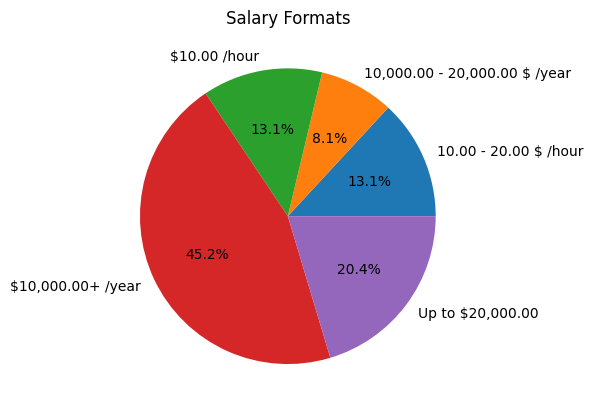

In [ ]:
# генерация нужного шаблона в зависимости от переданных параметров
def generate_pattern(*args):
    return '|'.join(args)

p1 = generate_pattern(r'\d+\.\d+\s?-\s?\d+\.\d+\s?\$?\/hour')
p2 = generate_pattern(r'\$?\d+,\d+\.\d+\s?-\s?\$?\d+,\d+\.\d+\s?\$?\/year')
p3 = generate_pattern(r'\$?\d+\.\d+\s?\/hour')
p4 = generate_pattern(r'\$?\d+,\d+\.\d+\+?\s?\/year')
p5 = generate_pattern(r'^Up to\s\$?\d{1,3}(,\d{3})*\.\d{2}$')

patterns = [p1, p2, p3, p4, p5]
salary_counts = [df['salary'].str.contains(pattern, regex=True).sum() for pattern in patterns]

salary_labels = ['10.00 - 20.00 $ /hour', '10,000.00 - 20,000.00 $ /year', '$10.00 /hour', '$10,000.00+ /year', 'Up to $20,000.00']

plt.pie(salary_counts, labels=salary_labels, autopct='%1.1f%%')
plt.title('Salary Formats')
plt.show()


Вы наверняка заметили, что есть записи для зарплаты в год и в день без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.

Постройте график, чтобы оценить значения в каждой из двух категорий.

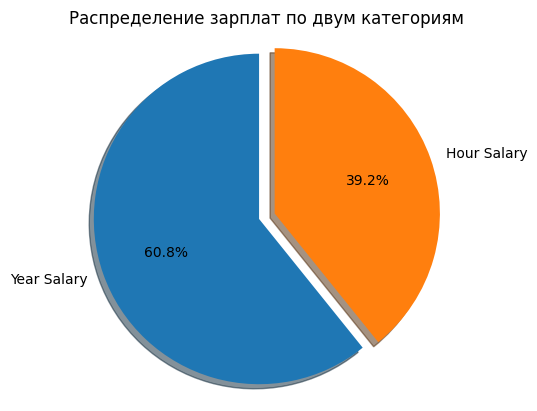

In [ ]:
# Очистка значений зарплаты и преобразование их в числа
salaries = df['salary'].str.replace('[^\d.-]', '', regex=True).replace('', np.nan)

# Обработка дефиса
salaries = salaries.apply(lambda x: x.split('-')[1] if '-' in str(x) else x if not pd.isna(x) else np.nan)

# Разделение на зарплаты
def filter_salaries(salaries, pattern):
    return salaries[salaries.notna() & df['salary'].str.contains(pattern)]

year_hour_salaries = filter_salaries(salaries, 'year|hour')
year_salaries = filter_salaries(salaries, 'year')
hour_salaries = filter_salaries(salaries, 'hour')


labels = ['Year Salary', 'Hour Salary']
sizes = [len(year_salaries), len(hour_salaries)]
explode = (0.1, 0)  # раздвигаем "Year Salary" сектор

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # круговая диаграмма должна быть круглой

plt.title('Распределение зарплат по двум категориям')
plt.show()



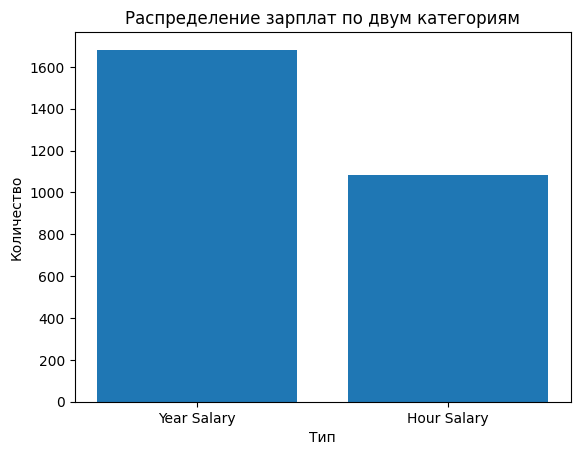

In [ ]:
plt.bar(['Year Salary', 'Hour Salary'], [len(year_salaries), len(hour_salaries)])
plt.xlabel('Тип')
plt.ylabel('Количество')
plt.title('Распределение зарплат по двум категориям')
plt.show()

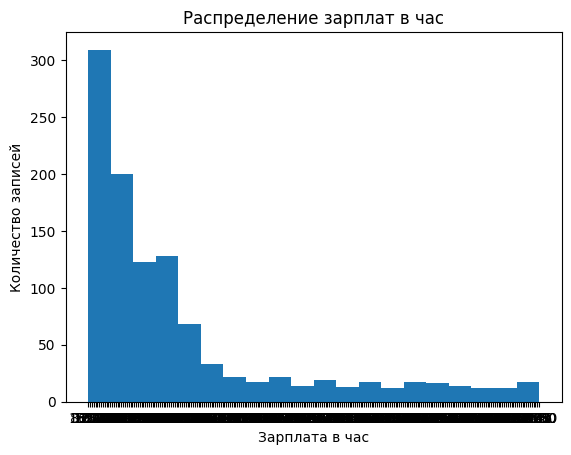

In [ ]:
# Построение графика для зарплаты в час
fig, ax = plt.subplots()
ax.hist(hour_salaries, bins=20)
ax.set_xlabel('Зарплата в час')
ax.set_ylabel('Количество записей')
ax.set_title('Распределение зарплат в час')
plt.show()

Сделайте выводы по графику и выведите правило определения, за какой период времени указана зарплата. Проверьте, что ничего не упустили.

**На графике мы видим, что большинство вакансий имеют зарплату, указанную в годовом эквиваленте. Также заметно, что значительная часть вакансий не имеет указанной зарплаты.**

**Что мы можем увидеть?**

Зарплата также может быть указана в месяц (month) и в неделю (week) – учтите это при составлении общего регулярного выражения.

Также в начале некоторых строк есть лишние пробелы, которые мы также учитываем.

Разделим столбец `salary` на зарплаты от, до, временной интервал (час, месяц, год) и бонусы. Для строк не попавших ни в одну категорию или с NaN в колонке salary установим все как NaN.

Также добавим колонку которая разделяет тип предложений (от-до, от, до, нет).

In [ ]:
# Определение типа зарплаты
pattern = re.compile(r'^\s*([\$€£]?\s?[\d,]+\.?\d*)\s?(?:-|to)\s?([\$€£]?\s?[\d,]+\.?\d*)?\s?(/hour|/month|/week|/year)?\s?(.*)?\s*$')

# Создание новых колонок
salary_info = df['salary'].str.extract(pattern, expand=True)
df[['salary_from', 'salary_to', 'salary_interval', 'bonus']] = salary_info[[0, 1, 2, 3]]
df[['salary_from', 'salary_to']] = df[['salary_from', 'salary_to']].replace('[^\d\.]', '', regex=True).astype(float)

# Установка значений NaN для строк, не попавших ни в одну категорию
mask = df['salary_from'].isna() & df['salary_to'].isna() & df['salary_interval'].isna() & df['bonus'].isna()
df.loc[mask, ['salary_from', 'salary_to', 'salary_interval', 'bonus']] = np.nan

# Создание колонки, которая указывает тип предложения
mask_range = (df['salary_from'].notna()) & (df['salary_to'].notna())
mask_single_from = (df['salary_from'].notna()) & (df['salary_to'].isna())
mask_single_to = (df['salary_from'].isna()) & (df['salary_to'].notna())

df.loc[mask_range, 'offer_type'] = 'от-до'
df.loc[mask_single_from, 'offer_type'] = 'от'
df.loc[mask_single_to, 'offer_type'] = 'до'
df.loc[~(mask_range | mask_single_from | mask_single_to), 'offer_type'] = np.nan

# Выводим только нужные столбцы
df.loc[df['salary'].notna(), ['salary', 'salary_from', 'salary_to', 'salary_interval', 'bonus', 'offer_type']].sample(10)

,salary,salary_from,salary_to,salary_interval,bonus,offer_type
14707,"0.00 - 56,000.00 /year",0.0,56000.0,/year,,от-до
15939,"45,000.00 - 70,000.00 $ /year",45000.0,70000.0,NaN,$ /year,от-до
18766,16.00 - 16.00 $ /hour,16.0,16.0,NaN,$ /hour,от-до
15185,"$40,000.00+ /yearbonus,nicentive",NaN,NaN,NaN,NaN,NaN
15882,PTO,NaN,NaN,NaN,NaN,NaN
11325,21.00 - 25.00 $ /hour,21.0,25.0,NaN,$ /hour,от-до
5776,"50,000.00 - 60,000.00 $ /year",50000.0,60000.0,NaN,$ /year,от-до
7923,"55,000.00 - 62,000.00 $ /year",55000.0,62000.0,NaN,$ /year,от-до
13069,14.00 - 15.00 $ /hour,14.0,15.0,NaN,$ /hour,от-до
11205,Will be discussed during interview,NaN,NaN,NaN,NaN,NaN


#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
df['job_type'].value_counts()

Full Time                                        6415
Full Time Employee                               6337
Full Time, Employee                              3107
Full Time Temporary/Contract/Project             1009
Full Time, Temporary/Contract/Project             514
Full Time , Employee                              381
Part Time                                         318
Part Time Employee                                315
Temporary/Contract/Project                        185
Part Time, Employee                               182
Employee                                          146
Full Time / Employee                              109
Full Time , Temporary/Contract/Project             48
Per Diem, Employee                                 29
Part Time, Temporary/Contract/Project              24
Per Diem                                           22
Job Type Full Time Employee                        19
Full Time                                          14
Part Time/ Temporary/Contrac

In [ ]:
df['job_type'].unique()

array(['Full Time Employee', 'Full Time', 'Part Time Employee', nan,
       'Full Time, Employee', 'Full Time Temporary/Contract/Project',
       'Full Time , Employee', 'Full Time, Temporary/Contract/Project',
       'Employee', 'Part Time, Employee', 'Full Time Intern',
       'Temporary/Contract/Project', 'Full Time / Employee',
       'Full Time , Temporary/Contract/Project', 'Part Time',
       'Per Diem, Employee', 'Job Type Full Time Employee', 'Per Diem',
       'Part Time, Temporary/Contract/Project', 'Part Time Intern',
       'Per Diem Employee', 'Part Time/ Temporary/Contract/Project',
       'Part Time , Temporary/Contract/Project', 'Full Time\xa0 Employee',
       'Part Time Temporary/Contract/Project', 'Part Time Seasonal',
       'Part Time , Employee', 'Job Type Employee',
       'Job Type Full Time Temporary/Contract/Project',
       'Part Time, Intern', 'Job Type Full Time', 'Part Time / Employee',
       'Per Diem, Temporary/Contract/Project',
       'Job Type Part 

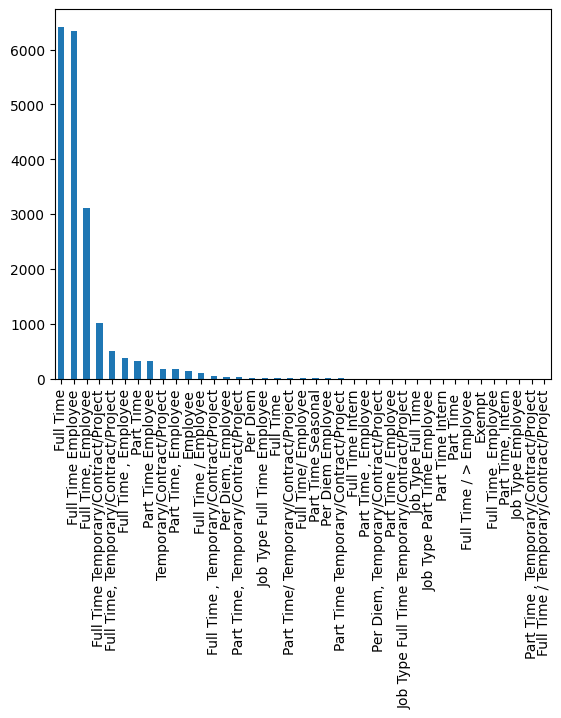

In [ ]:
df['job_type'].value_counts().plot(kind='bar')
plt.show()

Можно сделать вывод, что в столбце job_type содержатся различные форматы значений, что может затруднять анализ данных и усложнять обработку данных. Например, есть значения, в которых указано несколько типов занятости (Full Time, Temporary/Contract/Project), различные вариации написания (Full Time Employee, Full Time, Employee, Full Time / Employee), сокращения (Per Diem), а также опечатки (Full Time Employee).

Необходимо привести все значения к единому формату, чтобы было проще производить анализ данных. 

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

Теперь видно, что тип работы состоит из двух частей: полноты занятости (Full Time, Part Time, ...) и типа занятости (Employee, Intern, ...). Встречаются неполные записи. Будем считать по умолчанию полноту занятости Full Time и тип занятости Employee и разделим эту колонку на две.

In [ ]:
# словарь синонимов
job_type_synonyms = {
    'Full Time Employee': 'Full Time, Employee',
    'Full Time Temporary/Contract/Project': 'Full Time, Temporary/Contract/Project',
    'Full Time , Employee': 'Full Time, Employee',
    'Full Time\xa0 Employee': 'Full Time, Employee',
    'Job Type Full Time Employee': 'Full Time, Employee',
    'Job Type Full Time Temporary/Contract/Project': 'Full Time, Temporary/Contract/Project',
    'Job Type Full Time': 'Full Time',
    'Part Time Employee': 'Part Time, Employee',
    'Part Time, Employee': 'Part Time, Employee',
    'Part Time Temporary/Contract/Project': 'Part Time, Temporary/Contract/Project',
    'Part Time, Temporary/Contract/Project': 'Part Time, Temporary/Contract/Project',
    'Part Time\xa0': 'Part Time',
    'Part Time/ Temporary/Contract/Project': 'Part Time, Temporary/Contract/Project',
    'Part Time , Employee': 'Part Time, Employee',
    'Full Time Intern': 'Full Time, Intern',
    'Part Time Intern': 'Part Time, Intern',
    'Full Time / Employee': 'Full Time, Employee',
    'Full Time , Temporary/Contract/Project': 'Full Time, Temporary/Contract/Project',
    'Part Time / Employee': 'Part Time, Employee',
    'Per Diem, Employee': 'Per Diem, Employee',
    'Per Diem Employee': 'Per Diem, Employee',
    'Per Diem, Temporary/Contract/Project': 'Per Diem, Temporary/Contract/Project',
    'Exempt': 'Full Time, Exempt',
    'Full Time / Temporary/Contract/Project': 'Full Time, Temporary/Contract/Project',
    'Temporary/Contract/Project': 'Temporary/Contract/Project',
    'Full Time\xa0': 'Full Time',
    'Job Type Employee': 'Employee',
    'Job Type Part Time Employee': 'Part Time, Employee',
    'Part Time, Intern': 'Part Time, Intern',
    'Part Time Seasonal': 'Part Time, Seasonal'
}

# замена синонимов
for key, value in job_type_synonyms.items():
    df['job_type'] = df['job_type'].str.replace(key, value)

# разделение на две колонки
df[['employment_type', 'employment_status']] = df['job_type'].str.split(',', n=1, expand=True)
df[['job_type','employment_type', 'employment_status']]

,job_type,employment_type,employment_status
0,"Full Time, Employee",Full Time,Employee
1,Full Time,Full Time,None
2,Full Time,Full Time,None
3,"Full Time, Employee",Full Time,Employee
4,"Full Time, Employee",Full Time,Employee
...,...,...,...
20074,"Full Time, Employee",Full Time,Employee
20075,"Full Time, Temporary/Contract/Project",Full Time,Temporary/Contract/Project
20076,"Full Time, Employee",Full Time,Employee
20077,"Full Time, Employee",Full Time,Employee


In [ ]:
df = df.drop('job_type', axis=1)
df[['employment_type', 'employment_status']]

,employment_type,employment_status
0,Full Time,Employee
1,Full Time,None
2,Full Time,None
3,Full Time,Employee
4,Full Time,Employee
...,...,...
20074,Full Time,Employee
20075,Full Time,Temporary/Contract/Project
20076,Full Time,Employee
20077,Full Time,Employee


Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Для столбцов `job_title`, `organization` и `sector` самостоятельно выявите и реализуйте этапы анализа.

In [ ]:
df[['job_title']]

,job_title
0,IT Support Technician Job in Madison
1,Business Reporter/Editor Job in Madison
2,Engineer - Quality Job in Dixon
3,Shift Supervisor - Part-Time Job in Camphill
4,Construction PM - Charlottesville Job in Charl...
...,...
20074,Senior Materials Scientist - Neenah
20075,Talbridge Job Application for Data Quality Spe...
20076,Compunnel Software Group Job Application for O...
20077,HR Business Partner Job in Neenah


In [ ]:
# разбиваем значения в столбце 'job_title' на части
df['job_title']=df['job_title'].str.split('Job').str[0]
df[['job_title']]

,job_title
0,IT Support Technician
1,Business Reporter/Editor
2,Engineer - Quality
3,Shift Supervisor - Part-Time
4,Construction PM - Charlottesville
...,...
20074,Senior Materials Scientist - Neenah
20075,Talbridge
20076,Compunnel Software Group
20077,HR Business Partner


In [ ]:
df['job_title'] = df['job_title'].replace('Monster', '')
df[['job_title']]

,job_title
0,IT Support Technician
1,Business Reporter/Editor
2,Engineer - Quality
3,Shift Supervisor - Part-Time
4,Construction PM - Charlottesville
...,...
20074,Senior Materials Scientist - Neenah
20075,Talbridge
20076,Compunnel Software Group
20077,HR Business Partner


In [ ]:
df[['organization']].dropna()

,organization
1,Printing and Publishing
2,Altec Industries
3,Retail
4,Computer/IT Services
6,Hotels and Lodging Personal and Household Serv...
...,...
20068,Energy and Utilities
20070,Energy and Utilities
20075,Computer Software
20076,Computer Software


In [ ]:
df['organization'] = df['organization'].replace(['Other/Not Classified', 'All'], value=np.nan)
df[['organization']].dropna()

,organization
1,Printing and Publishing
2,Altec Industries
3,Retail
4,Computer/IT Services
6,Hotels and Lodging Personal and Household Serv...
...,...
20068,Energy and Utilities
20070,Energy and Utilities
20075,Computer Software
20076,Computer Software


In [ ]:
df[['sector']].dropna()

,sector
0,IT/Software Development
2,Experienced (Non-Manager)
3,Project/Program Management
4,Experienced (Non-Manager)
5,Experienced (Non-Manager)
...,...
20072,Project/Program Management
20073,Project/Program Management
20074,Biotech/R&D/Science
20077,Human Resources


### Краткая статистика очищенных данных

Проанализируйте результаты обработки данных. 
1. Сравните, что было до и после.
2. Определите, какие еще этапы можно было бы включить. Выберите один и реализуйте его. Если на ваш взгляд, текущего состояния достаточно, определите, какие задачи можно решать с помощью обработанного датасета и опишите этапы обработки, которые для них могут понадобиться.

In [ ]:
source = pd.read_csv('/content/drive/MyDrive/monster_com-job_sample.csv')
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.2     22000 non-null  int64 
 1   Unnamed: 0.1     22000 non-null  int64 
 2   Unnamed: 0       22000 non-null  int64 
 3   country          22000 non-null  object
 4   country_code     22000 non-null  object
 5   date_added       122 non-null    object
 6   has_expired      22000 non-null  object
 7   job_board        22000 non-null  object
 8   job_description  22000 non-null  object
 9   job_title        22000 non-null  object
 10  job_type         20372 non-null  object
 11  location         22000 non-null  object
 12  organization     15133 non-null  object
 13  page_url         22000 non-null  object
 14  salary           3446 non-null   object
 15  sector           16806 non-null  object
 16  uniq_id          22000 non-null  object
dtypes: int64(3), object(14)
memory 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20079 entries, 0 to 20078
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_description    20079 non-null  object 
 1   job_title          20079 non-null  object 
 2   location           20079 non-null  object 
 3   organization       12119 non-null  object 
 4   page_url           20079 non-null  object 
 5   salary             3291 non-null   object 
 6   sector             15860 non-null  object 
 7   uniq_id            20079 non-null  object 
 8   format             20079 non-null  object 
 9   city               17227 non-null  object 
 10  state              17286 non-null  object 
 11  idx                11331 non-null  object 
 12  salary_from        2634 non-null   float64
 13  salary_to          2634 non-null   float64
 14  salary_interval    52 non-null     object 
 15  bonus              2634 non-null   object 
 16  offer_type         263

In [ ]:
print("Размер датасета до обработки:", source.shape)
print("Размер датасета после обработки:", df.shape)

Размер датасета до обработки: (22000, 17)
Размер датасета после обработки: (20079, 19)


В ходе работы были добавлены новые столбцы, связанные с зарплатой (salary_from, salary_to, salary_interval, bonus), локацией (city, state, location) и типом занятости (employment_type, employment_status, offer_type). Также были удалены не нужные столбцы, которые содержали дублирующиеся значения или были почти полностью пустыми. Это помогло упростить датасет и сделать его более удобным для анализа зарплат, месторасположения и поиска по сектору работы. 

Особое внимание было уделено колонке с данными об организации, где было выделено местоположение и данные были занесены в новый столбец location. В результате, новый датасет стал более информативным и позволяет более точно анализировать рынок труда в нужных местах и в нужных секторах работы.

***Эксперимент***

Можно попробовать заполнить пропущенные значения в столбцах job_type, organization, salary или sector на основании информации в столбцах job_description и job_title.

Для этого можно использовать библиотеку Natural Language Processing (NLP) - spaCy для выполнения токенизации и извлечения сущностей из текста. Затем можно использовать методы сравнения строк, такие как расстояние Левенштейна, для нахождения наиболее похожих значений.


Аналогичным образом можно заполнить пропущенные значения в других столбцах (organization, salary или sector) на основании информации в столбцах job_description и job_title.